## Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Basic Graph

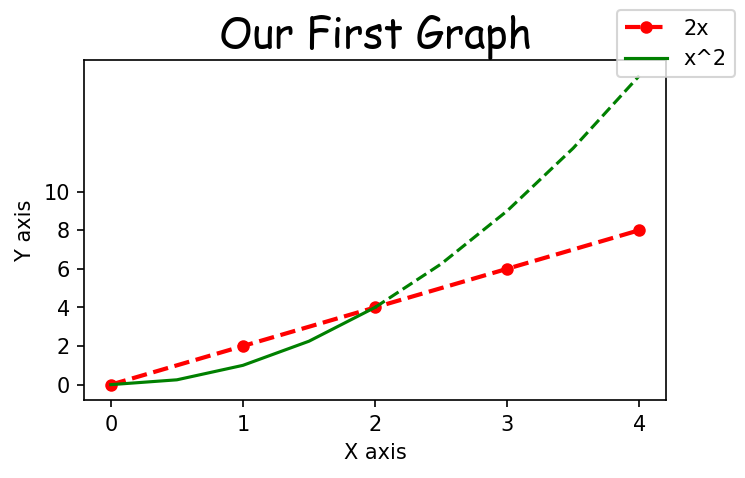

In [2]:
x = [ 0, 1, 2, 3, 4]
y = [ 0, 2, 4, 6, 8]

#Resize graph
plt.figure(figsize = (5,3), dpi = 150)

# Plot y = 2x line
plt.plot(x,y, label = "2x", color = "red", linewidth = 2, marker = '.', markersize = 10, linestyle = '--')
# SHORTHAND : plt.plot(x,y, 'r.--',label = "2x") 'r.--' = [colour][marker][linestyle]

#Plot y= x^2 graph
x2 = np.arange(0,4.5,0.5) #Points interval
plt.plot(x2[:5], x2[:5] **2, color = "g", label = "x^2") #First part is a line
plt.plot(x2[4:], x2[4:]**2, "g--") # Second Part is a dotted line

#Adding title and axis
plt.title("Our First Graph", fontdict = {'fontname' : 'Comic Sans MS', 'fontsize': '20'})
plt.xlabel("X axis")
plt.ylabel("Y axis")

#X and Y axis scale
plt.xticks([0,1,2,3,4])
plt.yticks([0,2,4,6,8,10])

#Add a legend
plt.figlegend()

#Save Graph : plt.savefig('mygraph.png', dpi = 300)

plt.show()

## Bar Chart


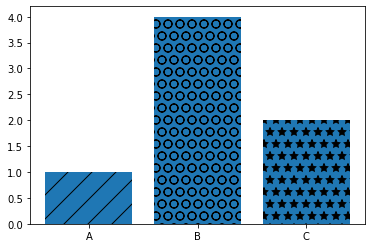

<Figure size 432x288 with 0 Axes>

In [3]:
labels = ['A', 'B', 'C']
values = [ 1, 4, 2]

bars = plt.bar(labels,values)

patterns = ['/', 'O', '*']

for bar in bars:
    bar.set_hatch(patterns.pop(0))


plt.figure(figsize = (6,4))

plt.show()

## Line Graph

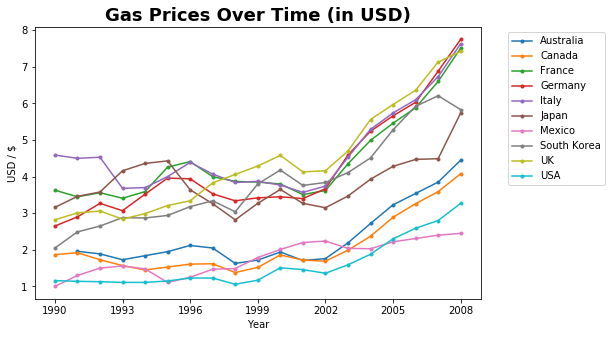

In [4]:
#Open csv
gas = pd.read_csv("gas_prices.csv")

plt.figure(figsize = (8,5))
plt.title("Gas Prices Over Time (in USD)", fontdict = {"fontweight" : "bold", "fontsize":"18"})

#Plot Points
#plt.plot(gas.Year, gas.USA, "b.-", label = "USA",)
#plt.plot(gas.Year, gas.Canada, "r.-",label = "Canada")
#plt.plot(gas.Year, gas['South Korea'], "g.-",label = "South Korea")
#plt.plot(gas.Year, gas.Australia, "y.-", label = "Australia")

for country in gas:
    if country != 'Year':
        plt.plot(gas.Year, gas[country], marker = '.', label = country)

plt.xticks(gas.Year[::3].tolist())
plt.xlabel("Year")
plt.ylabel("USD / $")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


plt.show()

## Histograms 

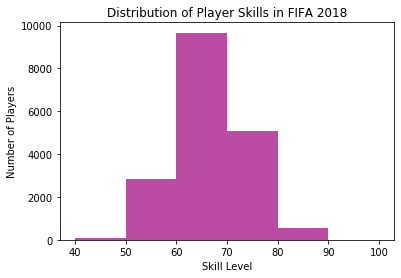

In [5]:
fifa = pd.read_csv("fifa_data.csv")
bins = []
for i in range(4,11):
    bins.append(10*i)

plt.hist(fifa.Overall, bins = bins, color = "#ba4ca4")
plt.xticks = bins

plt.title("Distribution of Player Skills in FIFA 2018")
plt.ylabel("Number of Players")
plt.xlabel("Skill Level")
plt.show()

## Pie Charts

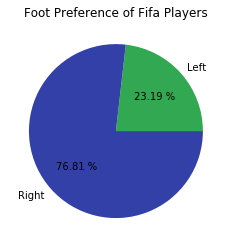

In [6]:
left = fifa.loc[fifa['Preferred Foot'] == "Left"].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == "Right"].count()[0]

plt.pie([left, right], labels = ["Left", "Right"], colors = ["#32a852","#3240a8"], autopct = "%.2f %%")
plt.title("Foot Preference of Fifa Players")
plt.show()

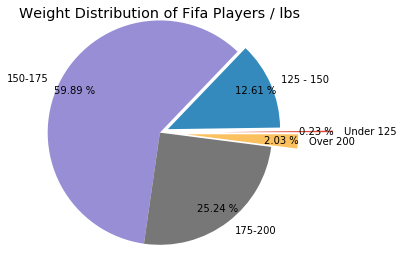

In [7]:
fifa['Weight'] = [int(x.strip("lbs")) if type(x) == str else x for x in fifa.Weight]

plt.style.use("ggplot")

light = fifa.loc[fifa['Weight'] < 125].count()[0]
light_medium = fifa.loc[(fifa['Weight'] >= 125) & (fifa["Weight"] < 150 )].count()[0]
medium = fifa.loc[(fifa['Weight'] >= 150) & (fifa["Weight"] < 175 )].count()[0]
medium_heavy = fifa.loc[(fifa['Weight'] >= 175) & (fifa["Weight"] < 200 )].count()[0]
heavy = fifa.loc[fifa['Weight'] >= 200].count()[0]

weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ["Under 125", "125 - 150", "150-175", "175-200", "Over 200"]
explode = (.7,.1,.0,.0,.3)

plt.pie(weights, labels = labels, autopct = "%.2f %%", pctdistance = 0.85, explode = explode,  radius = 1.29)
plt.title("Weight Distribution of Fifa Players / lbs")
plt.show()


## Box Plot

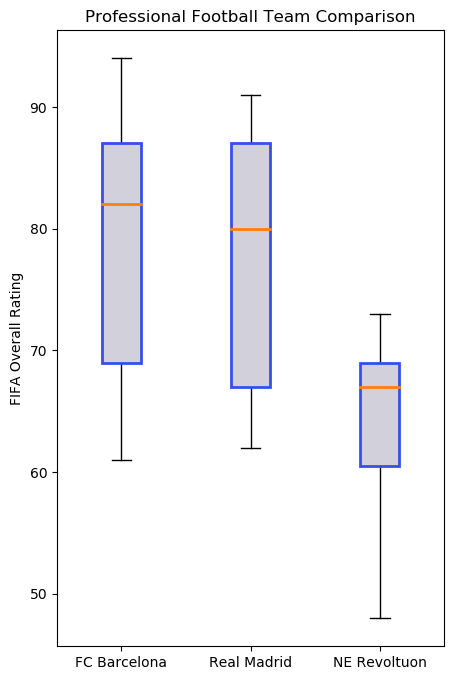

In [30]:
plt.style.use('default')

plt.figure(figsize = (5,8))

barcelona = fifa.loc[fifa['Club'] == "FC Barcelona"]['Overall']
madrid = fifa.loc[fifa['Club'] == "Real Madrid"]['Overall']
revs = fifa.loc[fifa['Club'] == "New England Revolution"]['Overall']

labels = ['FC Barcelona', 'Real Madrid','NE Revoltuon']

boxes = plt.boxplot([barcelona, madrid, revs], labels = labels, patch_artist = True, medianprops = {"linewidth" : "2"})

for box in boxes['boxes']:
    box.set(color = "#344feb", linewidth = 2) #Edge colour
    box.set(facecolor = "#d2d0db") #Fill colour
    
    

plt.title('Professional Football Team Comparison')
plt.ylabel("FIFA Overall Rating")
plt.show()